# Exploring places in Ahmedabad, India

### Introduction


In this notebook, we will identify various places Ahmedabad, India by  using Foursquare API and Zomato API.
This will help people visiting ahmedabad to select the restaurants that suit them the best.

Ahmedabad is the largest city in the Indian state of Gujarat. It is spread across approximately 460 square kilometers. It is situated on the banks of the Sabarmati river, mostly known for its tourist attractions. This project will help tourist to choose restaurant as per their choice of price and ratings.



Let us use folium to generate map of Ahmedabad city. Here we will explore areas around Gujarat University,Ahmedabad. 

In [1]:
''' Co-ordinates of Gujarat university, Ahmedabad'''
AMD_LATITUDE = '23.0364'
AMD_LONGITUDE = '72.5467'
print('The geograpical coordinates of Ahmedabad are {}, {}.'.format(AMD_LATITUDE, AMD_LONGITUDE))

The geograpical coordinates of Ahmedabad are 23.0364, 72.5467.


In [2]:
import folium

ahmedabad_map = folium.Map(location = [AMD_LATITUDE, AMD_LONGITUDE], zoom_start = 13)
folium.Marker([AMD_LATITUDE, AMD_LONGITUDE]).add_to(ahmedabad_map)
ahmedabad_map

## Data

Using /explore endpoint of Foursquare API, we can get places withing given radius around given co-ordinates. In our case it is co-ordinates of Gujarat university,Ahmedabad.

To use foursquare api we need client_id and client_secret keys for authentication. This can be obtained by creating developer account on foursquare website. 

We will fetch all the information available about places around Gujarat University, Ahmedabad within radius of  5 KM by fetching 100 places in each iteration.

In [3]:
FOURSQUARE_CLIENT_ID = '1QADG4ZIYO3Z2GIXGEDTS44EZKG0EMJKTM0GE3SO54E2F0AN'
FOURSQUARE_CLIENT_SECRET = '1ZC0OZ5BRAM5VSYJQXTBT33LM1ULIMBWKGON31WSY0IJD5LU'
RADIUS = 5000 # 5 Km
NO_OF_VENUES = 100
VERSION = '20200207' #Current Date 

We define the get_category_type method to get the correct category for each venue

In [4]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from pandas.io.json import json_normalize
import requests

pd.set_option('display.max_rows', None)

offset = 0
total_venues = 0
foursquare_venues = pd.DataFrame(columns = ['name', 'categories', 'lat', 'lng'])

while (True):
    url = ('https://api.foursquare.com/v2/venues/explore?client_id={}'
           '&client_secret={}&v={}&ll={},{}&radius={}&limit={}&offset={}').format(FOURSQUARE_CLIENT_ID, 
                                                                        FOURSQUARE_CLIENT_SECRET, 
                                                                        VERSION, 
                                                                        AMD_LATITUDE, 
                                                                        AMD_LONGITUDE, 
                                                                        RADIUS,
                                                                        NO_OF_VENUES,
                                                                        offset)
    result = requests.get(url).json()
    venues_fetched = len(result['response']['groups'][0]['items'])
    total_venues = total_venues + venues_fetched
    print("Total {} venues fetched within a total radius of {} Km".format(venues_fetched, RADIUS/1000))

    venues = result['response']['groups'][0]['items']
    venues = json_normalize(venues)
    # Filter the columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    venues = venues.loc[:, filtered_columns]

    # Filter the category for each row
    venues['venue.categories'] = venues.apply(get_category_type, axis = 1)

    # Clean all column names
    venues.columns = [col.split(".")[-1] for col in venues.columns]
    foursquare_venues = pd.concat([foursquare_venues, venues], axis = 0, sort = False)
    
    if (venues_fetched < 100):
        break
    else:
        offset = offset + 100
    
foursquare_venues = foursquare_venues.reset_index(drop = True)
print("\nTotal {} venues fetched".format(total_venues))

Total 100 venues fetched within a total radius of 5.0 Km
Total 100 venues fetched within a total radius of 5.0 Km
Total 3 venues fetched within a total radius of 5.0 Km

Total 203 venues fetched


In [6]:
foursquare_venues

,name,categories,lat,lng
0,Zencafe,Café,23.036322,72.549455
1,Upper Crust,Diner,23.041185,72.548784
2,K K tea stall,Tea Room,23.030198,72.540535
3,7 Violettes,Bakery,23.040112,72.547647
4,Cinepolis,Multiplex,23.039896,72.531727
5,Ahmedabad One,Shopping Mall,23.039758,72.531317
6,TOMATO'S,Mexican Restaurant,23.026693,72.557488
7,Mocha,Café,23.029512,72.554790
8,Amdavad ni Gufa,Art Gallery,23.036299,72.549433
9,All The Perks,Café,23.040796,72.548890


Using Search endpoint of Zomato API , we will find information like  price_range and rating by searching above fetched data from Foursquare API.

Zomato API requires  user key which can be obtained by creating developer account on Zomato website.



In [7]:
headers = {'user-key': '08a6538b919c629af1ec2c1c7eb591e8'}
venues_information = []

for index, row in foursquare_venues.iterrows():
    print("Fetching data for venue: {}".format(index + 1))
    venue = []
    url = ('https://developers.zomato.com/api/v2.1/search?q={}' + 
          '&start=0&count=1&lat={}&lon={}&sort=real_distance').format(row['name'], row['lat'], row['lng'])
    result = requests.get(url, headers = headers).json()
    if (len(result['restaurants']) > 0):
        venue.append(result['restaurants'][0]['restaurant']['name'])
        venue.append(result['restaurants'][0]['restaurant']['location']['latitude'])
        venue.append(result['restaurants'][0]['restaurant']['location']['longitude'])
        venue.append(result['restaurants'][0]['restaurant']['average_cost_for_two'])
        venue.append(result['restaurants'][0]['restaurant']['price_range'])
        venue.append(result['restaurants'][0]['restaurant']['user_rating']['aggregate_rating'])
        venue.append(result['restaurants'][0]['restaurant']['location']['address'])
        venues_information.append(venue)
    else:
        venues_information.append(np.zeros(6))
    
zomato_venues = pd.DataFrame(venues_information, 
                                  columns = ['venue', 'latitude', 
                                             'longitude', 'price_for_two', 
                                             'price_range', 'rating', 'address'])

Fetching data for venue: 1
Fetching data for venue: 2
Fetching data for venue: 3
Fetching data for venue: 4
Fetching data for venue: 5
Fetching data for venue: 6
Fetching data for venue: 7
Fetching data for venue: 8
Fetching data for venue: 9
Fetching data for venue: 10
Fetching data for venue: 11
Fetching data for venue: 12
Fetching data for venue: 13
Fetching data for venue: 14
Fetching data for venue: 15
Fetching data for venue: 16
Fetching data for venue: 17
Fetching data for venue: 18
Fetching data for venue: 19
Fetching data for venue: 20
Fetching data for venue: 21
Fetching data for venue: 22
Fetching data for venue: 23
Fetching data for venue: 24
Fetching data for venue: 25
Fetching data for venue: 26
Fetching data for venue: 27
Fetching data for venue: 28
Fetching data for venue: 29
Fetching data for venue: 30
Fetching data for venue: 31
Fetching data for venue: 32
Fetching data for venue: 33
Fetching data for venue: 34
Fetching data for venue: 35
Fetching data for venue: 36
F

In [8]:
ahmedabad_map = folium.Map(location = [AMD_LATITUDE, AMD_LONGITUDE], zoom_start = 13)

for name, latitude, longitude in zip(foursquare_venues['name'], foursquare_venues['lat'], foursquare_venues['lng']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = 'green',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(ahmedabad_map)  

ahmedabad_map

In [9]:
ahmedabad_map = folium.Map(location = [AMD_LATITUDE, AMD_LONGITUDE], zoom_start = 13)

for venue, address, latitude, longitude in zip(zomato_venues['venue'], zomato_venues['address'], 
                                               zomato_venues['latitude'], zomato_venues['longitude']):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = 'red',
        fill = True,
        fill_color = '#cc3535',
        fill_opacity = 0.7,
        parse_html = False).add_to(ahmedabad_map)  

ahmedabad_map

Here, we have identified many places by both Zomato as well as Foursquare. Now we will combine above two datasets and  check that the latitude and longitude values of each corresponding places match upto four decimal places and differnce not more than 0.0006.

In [10]:
foursquare_venues['lat'] = foursquare_venues['lat'].apply(lambda lat: round(float(lat), 4))
foursquare_venues['lng'] = foursquare_venues['lng'].apply(lambda lng: round(float(lng), 4))
zomato_venues['latitude'] = zomato_venues['latitude'].apply(lambda lat: round(float(lat), 4))
zomato_venues['longitude'] = zomato_venues['longitude'].apply(lambda lng: round(float(lng), 4))

In [11]:
dataset = pd.concat([foursquare_venues, zomato_venues], axis = 1)
dataset['lat_diff'] = dataset['latitude'] - dataset['lat']
dataset['lng_diff'] = dataset['longitude'] - dataset['lng']

In [12]:
selected_venues = dataset[(abs(dataset['lat_diff']) <= 0.0006) & (abs(dataset['lng_diff']) <= 0.0006)].reset_index(drop = True)


Dropping places which have rating 0. That means this places are not rated or very new and we don't have sufficient data about those places.

In [13]:
selected_venues = selected_venues[selected_venues['rating'] != 0.0]


In [14]:
selected_venues.reset_index(inplace=True,drop=True)
selected_venues

,name,categories,lat,lng,venue,latitude,longitude,price_for_two,price_range,rating,address,lat_diff,lng_diff
0,Zencafe,Café,23.0363,72.5495,Zen Cafe,23.0363,72.5497,800.0,3.0,4.2,"Kasturbhai Lalbhai Campus, University Area, Na...",0.0000,0.0002
1,Upper Crust,Diner,23.0412,72.5488,Cafe Upper Crust,23.0411,72.5487,1000.0,3.0,4.3,"Aarohi Complex, Vijay Cross Road, Navrangpura,...",-0.0001,-0.0001
2,7 Violettes,Bakery,23.0401,72.5476,7Violettes,23.0401,72.5477,500.0,2.0,4.3,"A 2, Vishal Apartments, Off University Road, ...",0.0000,0.0001
3,Ahmedabad One,Shopping Mall,23.0398,72.5313,Truly Fresh,23.0398,72.5314,150.0,1.0,3.0,"Unit 2, Bus Kiosk, Alpha One Mall 3rd Floor, O...",0.0000,0.0001
4,Mocha,Café,23.0295,72.5548,Mocha,23.0294,72.5549,1200.0,3.0,4.6,"10, Vasant Baug Society, Near IDBI Bank, CA Ci...",-0.0001,0.0001
5,All The Perks,Café,23.0408,72.5489,Ristretto - Behind the Rods,23.0409,72.5488,1000.0,3.0,4.3,"A-1, Ground Floor, Maharaja Palace, University...",0.0001,-0.0001
6,Swati Snacks,Snack Place,23.0244,72.5591,Swati Snacks,23.0245,72.5590,600.0,2.0,4.8,"Near Law Garden, Ellis Bridge, Ahmedabad",0.0001,-0.0001
7,SandwichworkZ,Café,23.0286,72.5428,SandwichworkZ - The Fusion Street Cafe,23.0284,72.5429,700.0,2.0,4.4,"5 & 6, Madhav Complex, IIM Road, Vastrapur, Ah...",-0.0002,0.0001
8,Dangee Dums,Dessert Shop,23.0276,72.5442,Dangee Dums,23.0276,72.5442,300.0,1.0,3.9,"4, Ground Floor, Sigma Legacy Building, IIM Ro...",0.0000,0.0000
9,Birmies,Indian Restaurant,23.0274,72.5445,Birmies,23.0272,72.5444,500.0,2.0,4.2,"13, Ground Floor, Antriksh Complex, Panjrapole...",-0.0002,-0.0001


In [15]:
selected_venues

,name,categories,lat,lng,venue,latitude,longitude,price_for_two,price_range,rating,address,lat_diff,lng_diff
0,Zencafe,Café,23.0363,72.5495,Zen Cafe,23.0363,72.5497,800.0,3.0,4.2,"Kasturbhai Lalbhai Campus, University Area, Na...",0.0000,0.0002
1,Upper Crust,Diner,23.0412,72.5488,Cafe Upper Crust,23.0411,72.5487,1000.0,3.0,4.3,"Aarohi Complex, Vijay Cross Road, Navrangpura,...",-0.0001,-0.0001
2,7 Violettes,Bakery,23.0401,72.5476,7Violettes,23.0401,72.5477,500.0,2.0,4.3,"A 2, Vishal Apartments, Off University Road, ...",0.0000,0.0001
3,Ahmedabad One,Shopping Mall,23.0398,72.5313,Truly Fresh,23.0398,72.5314,150.0,1.0,3.0,"Unit 2, Bus Kiosk, Alpha One Mall 3rd Floor, O...",0.0000,0.0001
4,Mocha,Café,23.0295,72.5548,Mocha,23.0294,72.5549,1200.0,3.0,4.6,"10, Vasant Baug Society, Near IDBI Bank, CA Ci...",-0.0001,0.0001
5,All The Perks,Café,23.0408,72.5489,Ristretto - Behind the Rods,23.0409,72.5488,1000.0,3.0,4.3,"A-1, Ground Floor, Maharaja Palace, University...",0.0001,-0.0001
6,Swati Snacks,Snack Place,23.0244,72.5591,Swati Snacks,23.0245,72.5590,600.0,2.0,4.8,"Near Law Garden, Ellis Bridge, Ahmedabad",0.0001,-0.0001
7,SandwichworkZ,Café,23.0286,72.5428,SandwichworkZ - The Fusion Street Cafe,23.0284,72.5429,700.0,2.0,4.4,"5 & 6, Madhav Complex, IIM Road, Vastrapur, Ah...",-0.0002,0.0001
8,Dangee Dums,Dessert Shop,23.0276,72.5442,Dangee Dums,23.0276,72.5442,300.0,1.0,3.9,"4, Ground Floor, Sigma Legacy Building, IIM Ro...",0.0000,0.0000
9,Birmies,Indian Restaurant,23.0274,72.5445,Birmies,23.0272,72.5444,500.0,2.0,4.2,"13, Ground Floor, Antriksh Complex, Panjrapole...",-0.0002,-0.0001


Dropping data where categories are not of eateries or restaurants.

In [16]:

selected_venues=selected_venues[selected_venues['categories'].apply(lambda a: a not in ['Farm','Men\'s Store','Zoo','Clothing Store','Historic Site','Park','Farmers Market','Multiplex','Arcade','Bookstore','Shopping Mall'] )]
print("Total venues available: {}".format(selected_venues.shape[0]))

Total venues available: 129


### Methodology Section

Aim of this project is to find best places in Ahmedabad based on their rating and average costs. It will help any visitor or tourist to identify places to visit according to their preferences. To do this we retrieved data from two APIs (Foursquare and Zomato). Places within a range of  5 Km from Gujarat University, Ahmedabad were extracted using Foursquare API. The latitude and longitude values are then used to fetch venue ratings and price from Zomato.

After, we then explored the data retrieved from the two APIs on the map. The data from the two sources is carefully combined based on the name, latitude and longitude values from the two sources. The final dataset would include the rating and price values for each place.

We will analyze this dataset based on the price, ratings and category and location. We will plot this on a map using folium to analyze it further.
After that, we will cluster the venues based on the available information of each venue. This will allow us to identify the places which can be recommended. 

#### Analyzing places by categories

<BarContainer object of 27 artists>

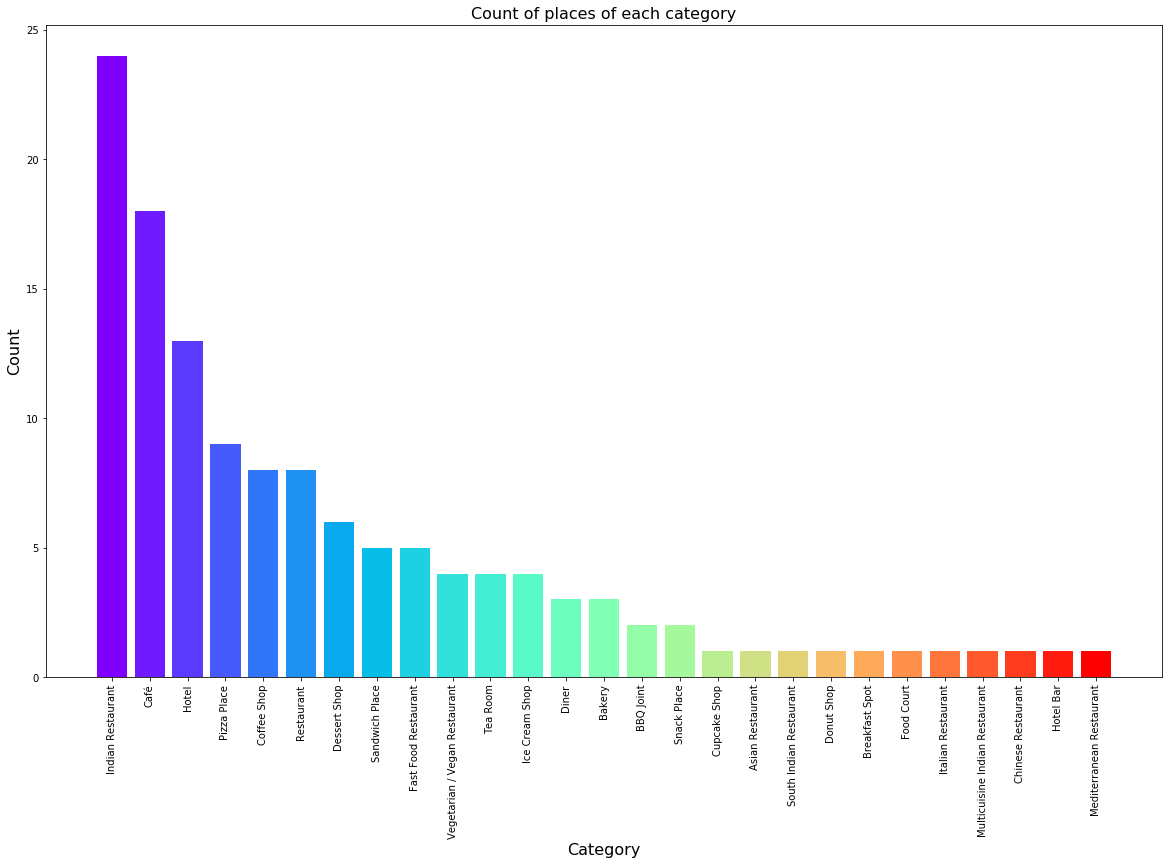

In [17]:
venue_distribution = selected_venues['categories'].value_counts()
colors = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))
plt.figure(figsize = (20, 12))
plt.xticks(rotation = 90)
plt.xlabel("Category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of places of each category", fontsize = 16)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors)

Here we can see the majority places are Indian Restaurant, Cafe, Hotel, Coffee Shop, Restaurant and Pizza Place.

#### Analyzing places by rating

/home/rinni/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Count of places with given rating')

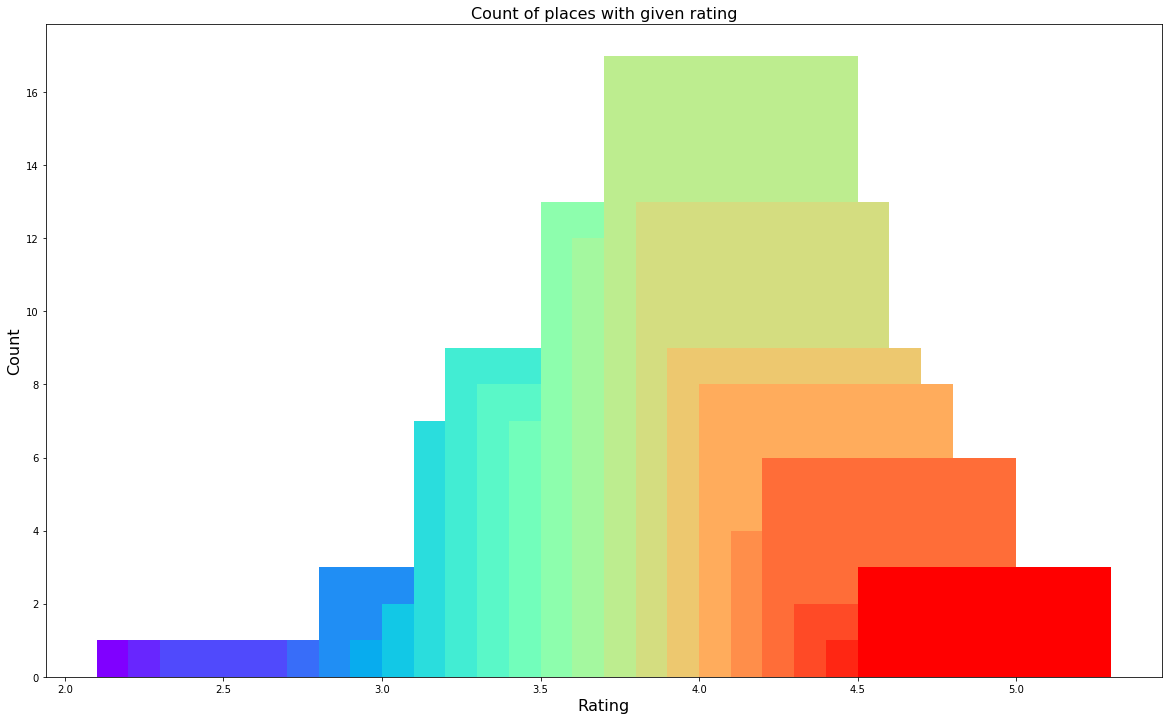

In [18]:
selected_venues['rating'] = selected_venues['rating'].astype(float)
rating = selected_venues['rating'].value_counts().sort_index()
plt.figure(figsize = (20, 12))
plt.bar(rating.index, rating.values, color = cm.rainbow(np.linspace(0, 1, len(rating.index))))
plt.xlabel("Rating", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of places with given rating", fontsize = 16)

Here we can see most of the places have rating around 4

Let's create bins for various ratings and plot them in different colors on the map. The ratings will be divided between 4 bins:

- 1 to 2
- 2 to 3
- 3 to 4
- 4 to 5

In [19]:
bins = [1.0, 2.0, 3.0, 4.0, 5.0]
labels = ['Low', 'Okay', 'Good', 'Very good']
selected_venues['rating_bin'] = pd.cut(selected_venues['rating'].astype(float), bins = bins, labels = labels, include_lowest = True)

/home/rinni/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Now, we will plot the venues on the map.

In [20]:
color_map = {'Low': 'red', 'Okay': 'orange', 'Good': 'green', 'Very good': 'darkgreen'}

ahmedabad_map = folium.Map(location = [AMD_LATITUDE, AMD_LONGITUDE], zoom_start = 13)

for name, address, latitude, longitude, rating_bin in zip(selected_venues['venue'], 
                                                          selected_venues['address'], 
                                                          selected_venues['latitude'], 
                                                          selected_venues['longitude'], 
                                                          selected_venues['rating_bin']):
    label = '{}, {},{}'.format(name, address,rating_bin)
    label = folium.Popup(label, parse_html = True)
    folium.Marker(
        [latitude, longitude],
        icon = folium.Icon(color = color_map[rating_bin]),
        popup = label).add_to(ahmedabad_map)  


ahmedabad_map

It appears that many venues are located near SG Highway and Ashram Road with rating above 3. If someone wants to explore new venues, they should definitely check out places there.

#### Analyzing places by  price

Zomato API provides approximate price for two person. We will use that to find average price for the venue. 

In [21]:
selected_venues['average_price'] = selected_venues['price_for_two']/2
selected_venues = selected_venues.drop(columns = ['name', 'lat', 'lng', 'lat_diff', 'lng_diff', 'price_for_two'])
selected_venues.head(10)

/home/rinni/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,categories,venue,latitude,longitude,price_range,rating,address,rating_bin,average_price
0,Café,Zen Cafe,23.0363,72.5497,3.0,4.2,"Kasturbhai Lalbhai Campus, University Area, Na...",Very good,400.0
1,Diner,Cafe Upper Crust,23.0411,72.5487,3.0,4.3,"Aarohi Complex, Vijay Cross Road, Navrangpura,...",Very good,500.0
2,Bakery,7Violettes,23.0401,72.5477,2.0,4.3,"A 2, Vishal Apartments, Off University Road, ...",Very good,250.0
4,Café,Mocha,23.0294,72.5549,3.0,4.6,"10, Vasant Baug Society, Near IDBI Bank, CA Ci...",Very good,600.0
5,Café,Ristretto - Behind the Rods,23.0409,72.5488,3.0,4.3,"A-1, Ground Floor, Maharaja Palace, University...",Very good,500.0
6,Snack Place,Swati Snacks,23.0245,72.5590,2.0,4.8,"Near Law Garden, Ellis Bridge, Ahmedabad",Very good,300.0
7,Café,SandwichworkZ - The Fusion Street Cafe,23.0284,72.5429,2.0,4.4,"5 & 6, Madhav Complex, IIM Road, Vastrapur, Ah...",Very good,350.0
8,Dessert Shop,Dangee Dums,23.0276,72.5442,1.0,3.9,"4, Ground Floor, Sigma Legacy Building, IIM Ro...",Good,150.0
9,Indian Restaurant,Birmies,23.0272,72.5444,2.0,4.2,"13, Ground Floor, Antriksh Complex, Panjrapole...",Very good,250.0
10,Sandwich Place,Subway,23.0283,72.5425,2.0,3.7,"6, Shivalik Plaza, Opposite Ahmedabad Manageme...",Good,250.0


Analyzing places with price by scatter plot

Text(0.5, 1.0, 'Count of venues with given average price')

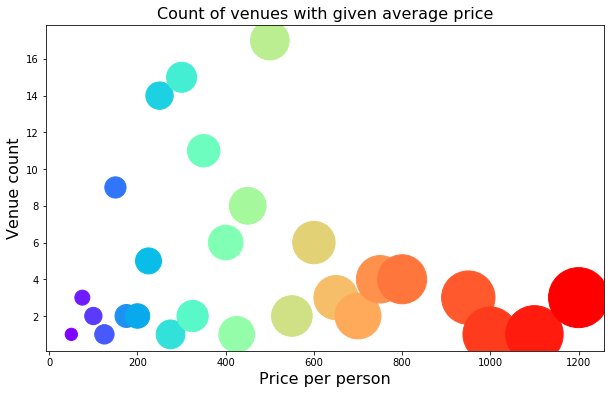

In [22]:
average_prices = selected_venues['average_price'].value_counts().sort_index()
plt.figure(figsize = (10, 6))
plt.scatter(average_prices.index, 
            average_prices.values, 
            s = average_prices.index*3, 
            c = cm.rainbow(np.linspace(0, 1, len(average_prices.index))))
plt.xlabel("Price per person", fontsize = 16)
plt.ylabel("Venue count", fontsize = 16)
plt.title("Count of venues with given average price", fontsize = 16)

It appears most of the places are with average price between 200 and 600

Let us plot this places on map which will help user to decide place based on price.

In [23]:
color_map = {'1.0': 'green', '2.0': 'darkgreen', '3.0': 'orange', '4.0': 'red'}

ahmedabad_map = folium.Map(location = [AMD_LATITUDE, AMD_LONGITUDE], zoom_start = 13)

for name, address, latitude, longitude, price_range in zip(selected_venues['venue'], 
                                                           selected_venues['address'], 
                                                           selected_venues['latitude'], 
                                                           selected_venues['longitude'], 
                                                           selected_venues['price_range'].astype(str)):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.Marker(
        [latitude, longitude],
        icon = folium.Icon(color = color_map[price_range]),
        popup = label).add_to(ahmedabad_map)  
ahmedabad_map

We can see that both SG Highway and Ashram road have places in all price range.

### Clustering

In [24]:
from sklearn.cluster import KMeans

NO_OF_CLUSTERS = 2

clustering = selected_venues.drop(['venue', 'address', 'rating_bin', 'categories'], 1)
kMeans = KMeans(n_clusters = NO_OF_CLUSTERS, random_state = 0).fit(clustering)
selected_venues.insert(0, 'cluster_labels', kMeans.labels_)
selected_venues.head(20)

,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,rating_bin,average_price
0,1,Café,Zen Cafe,23.0363,72.5497,3.0,4.2,"Kasturbhai Lalbhai Campus, University Area, Na...",Very good,400.0
1,1,Diner,Cafe Upper Crust,23.0411,72.5487,3.0,4.3,"Aarohi Complex, Vijay Cross Road, Navrangpura,...",Very good,500.0
2,1,Bakery,7Violettes,23.0401,72.5477,2.0,4.3,"A 2, Vishal Apartments, Off University Road, ...",Very good,250.0
4,0,Café,Mocha,23.0294,72.5549,3.0,4.6,"10, Vasant Baug Society, Near IDBI Bank, CA Ci...",Very good,600.0
5,1,Café,Ristretto - Behind the Rods,23.0409,72.5488,3.0,4.3,"A-1, Ground Floor, Maharaja Palace, University...",Very good,500.0
6,1,Snack Place,Swati Snacks,23.0245,72.5590,2.0,4.8,"Near Law Garden, Ellis Bridge, Ahmedabad",Very good,300.0
7,1,Café,SandwichworkZ - The Fusion Street Cafe,23.0284,72.5429,2.0,4.4,"5 & 6, Madhav Complex, IIM Road, Vastrapur, Ah...",Very good,350.0
8,1,Dessert Shop,Dangee Dums,23.0276,72.5442,1.0,3.9,"4, Ground Floor, Sigma Legacy Building, IIM Ro...",Good,150.0
9,1,Indian Restaurant,Birmies,23.0272,72.5444,2.0,4.2,"13, Ground Floor, Antriksh Complex, Panjrapole...",Very good,250.0
10,1,Sandwich Place,Subway,23.0283,72.5425,2.0,3.7,"6, Shivalik Plaza, Opposite Ahmedabad Manageme...",Good,250.0


In [25]:
ahmedabad_map = folium.Map(location = [AMD_LATITUDE, AMD_LONGITUDE], zoom_start = 13)
color_map = { 0: 'green', 1: 'blue'}

# add venues to the map
markers_colors = []
for venue, address, cluster, latitude, longitude in zip(selected_venues['venue'], 
                                                        selected_venues['address'], 
                                                        selected_venues['cluster_labels'], 
                                                        selected_venues['latitude'], 
                                                        selected_venues['longitude']):
    label = folium.Popup(str(venue) + ', ' + str(address), parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = color_map[cluster],
        fill = True,
        fill_color = color_map[cluster],
        fill_opacity = 0.7).add_to(ahmedabad_map)

# add cluster centers to the map
for index, cluster in enumerate(kMeans.cluster_centers_):
    latitude = cluster[0]
    longitude = cluster[1]
    label = folium.Popup("Cluster: " + str(index), parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 10,
        popup = label,
        color = color_map[index],
        fill = True,
        fill_color = color_map[index],
        fill_opacity = 0.7).add_to(ahmedabad_map)


ahmedabad_map

From the map, we see the two clusters:

1. The first cluster is spread across the whole city and includes the majority venues.
2. The second cluster is very sparsely spread and has very limited venues.

In [26]:
result = selected_venues[selected_venues['cluster_labels'] == 0]
print("Cluster 0")
result.head(10).reset_index(drop = True)

Cluster 0


,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,rating_bin,average_price
0,0,Café,Mocha,23.0294,72.5549,3.0,4.6,"10, Vasant Baug Society, Near IDBI Bank, CA Ci...",Very good,600.0
1,0,Hotel,Mrs Mage,23.0393,72.5306,4.0,4.6,"Plot 216, Hyatt, Town Plan Scheme 1, Near Vast...",Very good,800.0
2,0,Hotel,The Great Kabab Factory - Radisson Blu,23.0231,72.5571,4.0,3.9,"Radisson Blu, Near Panchvati Cross Road, Off C...",Good,1200.0
3,0,Hotel,China House - Hyatt Regency,23.0438,72.5701,4.0,4.5,"17 A, Ashram Road, Ahmedabad",Very good,1200.0
4,0,Indian Restaurant,The Great Kabab Factory - Radisson Blu,23.0231,72.5571,4.0,3.9,"Radisson Blu, Near Panchvati Cross Road, Off C...",Good,1200.0
5,0,Diner,650 - The Global Kitchen,23.0106,72.5375,3.0,4.3,"Shreekunj Mandapam, Beside Golden Tulip Bunglo...",Very good,600.0
6,0,Mediterranean Restaurant,Silver Leaf Bistro Restaurant,23.0487,72.5162,4.0,4.0,"Ground Floor, The Acropolis, Thaltej Cross Roa...",Good,750.0
7,0,Café,Mocha,23.0321,72.5113,3.0,4.9,"6-9, Ground Floor, Devashish Business Park, Op...",Very good,600.0
8,0,Restaurant,Yanki Sizzlers,23.0534,72.5182,3.0,4.9,"4, Ground Floor, Binori Ambit, Next to Renault...",Very good,700.0
9,0,Café,Zodiac- Fortune Landmark,23.0477,72.5706,4.0,4.4,"Fortune Landmark, Usmanpura, Ashram Road, Ahme...",Very good,1000.0


In [27]:
print("These venues for cluster 0 have mean price range of {:.02f} and rating spread around {:.02f}".
      format(result['price_range'].mean(), result['rating'].astype(float).mean()))

These venues for cluster 0 have mean price range of 3.59 and rating spread around 4.33


In [28]:
result = selected_venues[selected_venues['cluster_labels'] == 1]
print("Cluster 1")
result.head(10).reset_index(drop = True)


Cluster 1


,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,rating_bin,average_price
0,1,Café,Zen Cafe,23.0363,72.5497,3.0,4.2,"Kasturbhai Lalbhai Campus, University Area, Na...",Very good,400.0
1,1,Diner,Cafe Upper Crust,23.0411,72.5487,3.0,4.3,"Aarohi Complex, Vijay Cross Road, Navrangpura,...",Very good,500.0
2,1,Bakery,7Violettes,23.0401,72.5477,2.0,4.3,"A 2, Vishal Apartments, Off University Road, ...",Very good,250.0
3,1,Café,Ristretto - Behind the Rods,23.0409,72.5488,3.0,4.3,"A-1, Ground Floor, Maharaja Palace, University...",Very good,500.0
4,1,Snack Place,Swati Snacks,23.0245,72.5590,2.0,4.8,"Near Law Garden, Ellis Bridge, Ahmedabad",Very good,300.0
5,1,Café,SandwichworkZ - The Fusion Street Cafe,23.0284,72.5429,2.0,4.4,"5 & 6, Madhav Complex, IIM Road, Vastrapur, Ah...",Very good,350.0
6,1,Dessert Shop,Dangee Dums,23.0276,72.5442,1.0,3.9,"4, Ground Floor, Sigma Legacy Building, IIM Ro...",Good,150.0
7,1,Indian Restaurant,Birmies,23.0272,72.5444,2.0,4.2,"13, Ground Floor, Antriksh Complex, Panjrapole...",Very good,250.0
8,1,Sandwich Place,Subway,23.0283,72.5425,2.0,3.7,"6, Shivalik Plaza, Opposite Ahmedabad Manageme...",Good,250.0
9,1,Pizza Place,The Blue Oven,23.0395,72.5296,2.0,4.3,"7, Amrapali Lake View Tower, Opposite Alpha On...",Very good,350.0


In [29]:
print("These venues for cluster 1 have mean price range of {:.02f} and rating spread around {:.02f}".
      format(result['price_range'].mean(), result['rating'].astype(float).mean()))

These venues for cluster 1 have mean price range of 2.18 and rating spread around 3.90


### Results and Discussion 


With the help of above analysis, we can draw conclusions which will help people visiting Ahmedabad to locate places according to their preferences.

Initially we got list of 203 venues from Foursqare and Zomato APIs. After that we dropped places with unwanted categories and places without rating available.We also combined data of places obtained from Zomato and Foursquare APIs. Finally there were 129 places to analyze.

We find that he majority places are Indian Restaurant, Cafe, Hotel, Coffee Shop, Restaurant and Pizza Place. People who like places of these categories will love to visit Ahmedabad frequently.

While the complete range of ratings range from 1 to 5, the majority venues have ratings close to 4. This indicates the people who have previously visited this places have liked the quality of food and pricing. When we plot these venues on the map, we discover that there are clusters of venues around SG Highway and Ashram road.

While analyzing price range, majority of places falls in price range of 200 to 600. However, the variation in prices is very large, given the complete range starts from Rs 100 and goes uptil Rs 1200. On plotting these places on maps, we can see that  venues of both high and low price range are available at both SG Highway and Ashram road area.

Finally, through clusters we identified that there are many venues which are relatively lower priced but have an average rating of 3.90. On the other hand, there are few venues which are high priced and have average rating of 4.33.


### Conclusion
The goal of this project was to explore various  places that a person can visit while he is in Ahmedabad,Gujarat.The venues have been identified using Foursquare and Zomato API and have been plotted on the map. The map reveals that there are two major following areas near Gujarat University, Ahmedabad: S G Highway and Ashram Road. A person can easily identify places of their choice based on their priorities from the places plotted on maps.